**Giovano Panatta**

# EDA e Visualização

**Carregaremos a base “TP3_spx.csv”, que contém dados do índice Standard and Poor's 500, em um dataframe Pandas. Em seguida, executaremos a conversão de datas para que os dados possam ser utilizados corretamente.**

In [ ]:
import pandas as pd
spx_df = pd.read_csv('/work/TP3_spx.csv')
spx_df.head()

,date,close
0,02-Jan-86,209.59
1,03-Jan-86,210.88
2,06-Jan-86,210.65
3,07-Jan-86,213.80
4,08-Jan-86,207.97


In [ ]:
spx_df.tail()

,date,close
8187,25-Jun-18,2717.07
8188,26-Jun-18,2723.06
8189,27-Jun-18,2699.63
8190,28-Jun-18,2716.31
8191,29-Jun-18,2718.37


In [ ]:
#Convertendo a colina data (que está em object) para o formato data

spx_df['date'] = pd.to_datetime(spx_df['date'])
spx_df.dtypes

date     datetime64[ns]
close           float64
dtype: object

**Apresentaremos uma visualização temporal da série de dados, destacando as variações do índice Standard and Poor's 500 ao longo do tempo.**

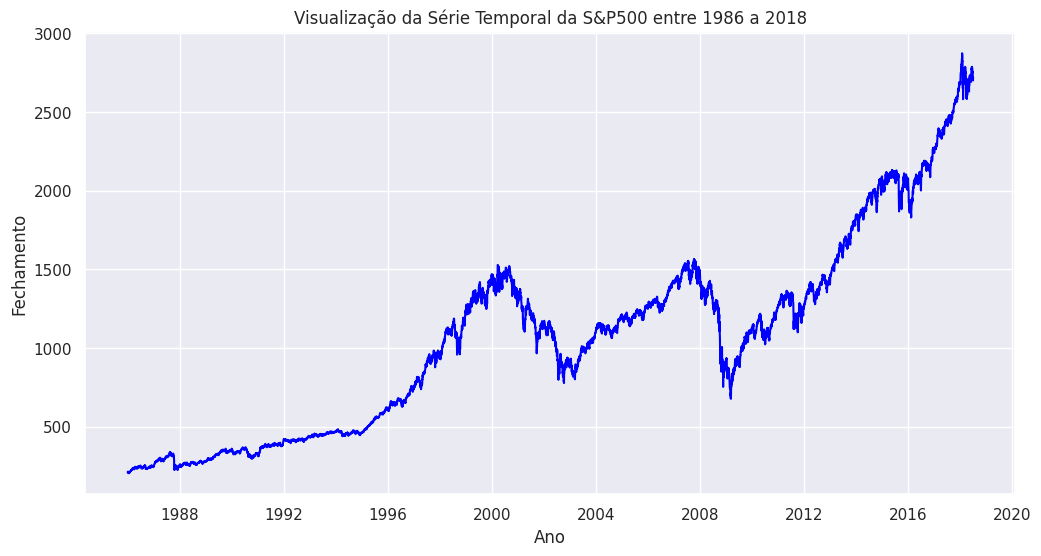

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')

plt.figure(figsize=(12, 6))
sns.lineplot(data=spx_df, x='date', y='close', color='blue')
plt.title('Visualização da Série Temporal da S&P500 entre 1986 a 2018')
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Fechamento', fontsize=12)
plt.show()


**Aplicaremos três suavizações na série, utilizando janelas de 30, 60 e 90 dias, e apresentaremos tanto a série original quanto as suavizadas em uma visualização única. Cada uma das séries será claramente identificada por meio de uma legenda.**

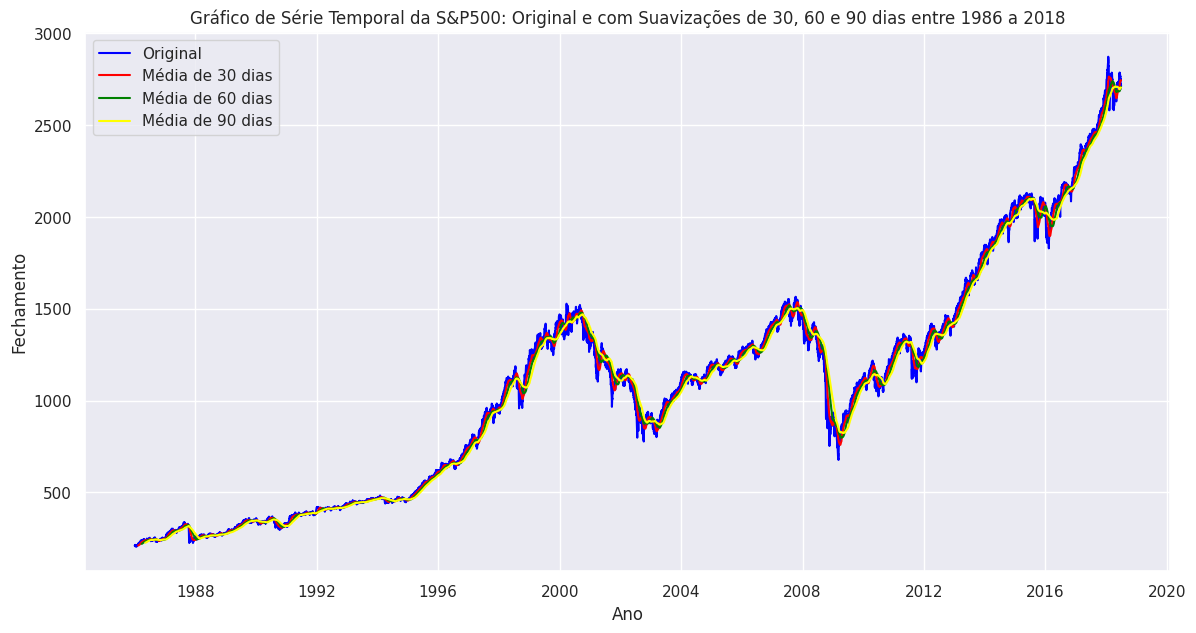

In [ ]:
# Suavização com janelas de 30, 60 e 90 dias com a função rolling e mean
spx_df['suavizacao_30'] = spx_df['close'].rolling(window=30).mean()
spx_df['suavizacao_60'] = spx_df['close'].rolling(window=60).mean()
spx_df['suavizacao_90'] = spx_df['close'].rolling(window=90).mean()

#Gráfico com série original e suavizadas com lineplot do seaborn
plt.figure(figsize=(14, 7))

sns.lineplot(data=spx_df, x='date', y='close', label='Original', color='blue')
sns.lineplot(data=spx_df, x='date', y='suavizacao_30', label='Média de 30 dias', color='red')
sns.lineplot(data=spx_df, x='date', y='suavizacao_60', label='Média de 60 dias', color='green')
sns.lineplot(data=spx_df, x='date', y='suavizacao_90', label='Média de 90 dias', color='yellow')

plt.title('Gráfico de Série Temporal da S&P500: Original e com Suavizações de 30, 60 e 90 dias entre 1986 a 2018')
plt.xlabel('Ano')
plt.ylabel('Fechamento')
plt.legend()
plt.show()

**A partir da série original e sua suavização com janela de 15 dias (com gráfico isolado apenas com estas duas), apresentaremos o padrão existente para identificar quando o preço tende a subir ou descer. Desta forma, poderemos programar um hipotético robô de investimento que aproveite estas oportunidades de negócio.**

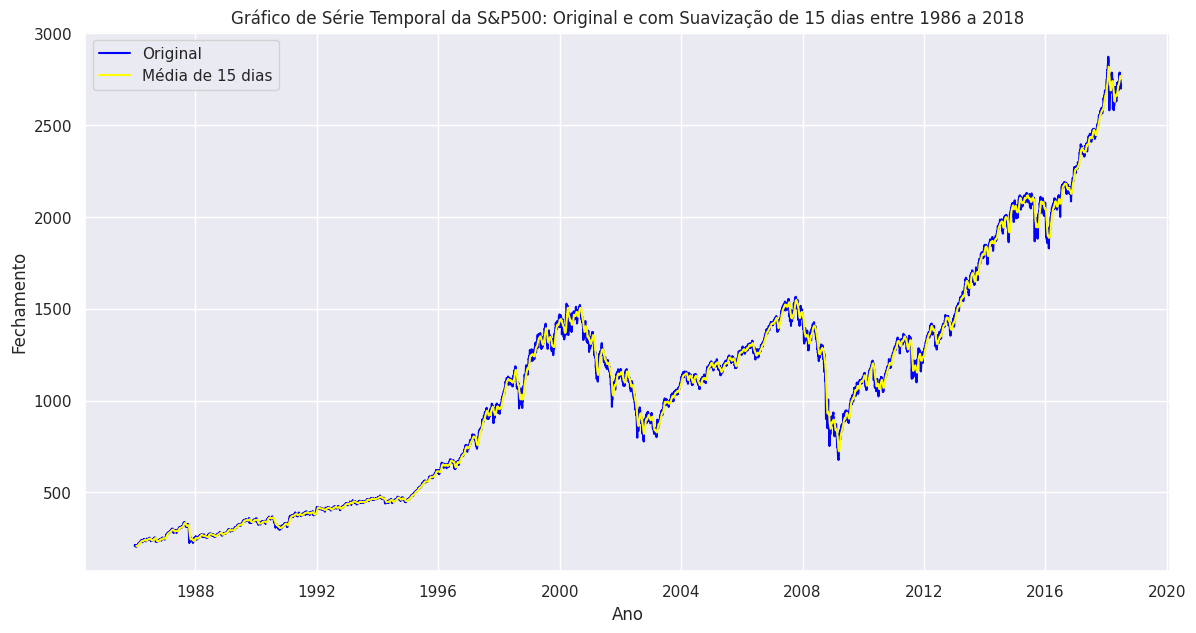

In [ ]:
# Suavização com janela de 15 dias com a função rolling e mean
spx_df['suavizacao_15'] = spx_df['close'].rolling(window=15).mean()

#Gráfico com série original e suavizadas com lineplot do seaborn
plt.figure(figsize=(14, 7))

sns.lineplot(data=spx_df, x='date', y='close', label='Original', color='blue')
sns.lineplot(data=spx_df, x='date', y='suavizacao_15', label='Média de 15 dias', color='yellow')

plt.title('Gráfico de Série Temporal da S&P500: Original e com Suavização de 15 dias entre 1986 a 2018')
plt.xlabel('Ano')
plt.ylabel('Fechamento')
plt.legend()
plt.show()


**Conclusões:** Após a análise detalhada do gráfico em questão, observamos flutuações significativas, com destaque para picos de declínio notáveis nos anos de 2003, 2008 (correspondente à Crise Financeira Global) e, apesar de uma recuperação notável do mercado, uma redução considerável em 2016. Seguindo este período, e até o advento da pandemia de COVID-19, registramos um crescimento estável.

Considerando que o conjunto de dados em questão abrange exclusivamente o período pré-pandemia, e com o intuito de conduzir um exercício teórico, focalizaremos nossa análise nos dois anos que antecedem a última data registrada, de Janeiro de 2016 até 29 de Junho de 2018. Este enfoque tem como objetivo a identificação de padrões que possam fundamentar o desenvolvimento de estratégias de investimento sob um cenário hipotético.

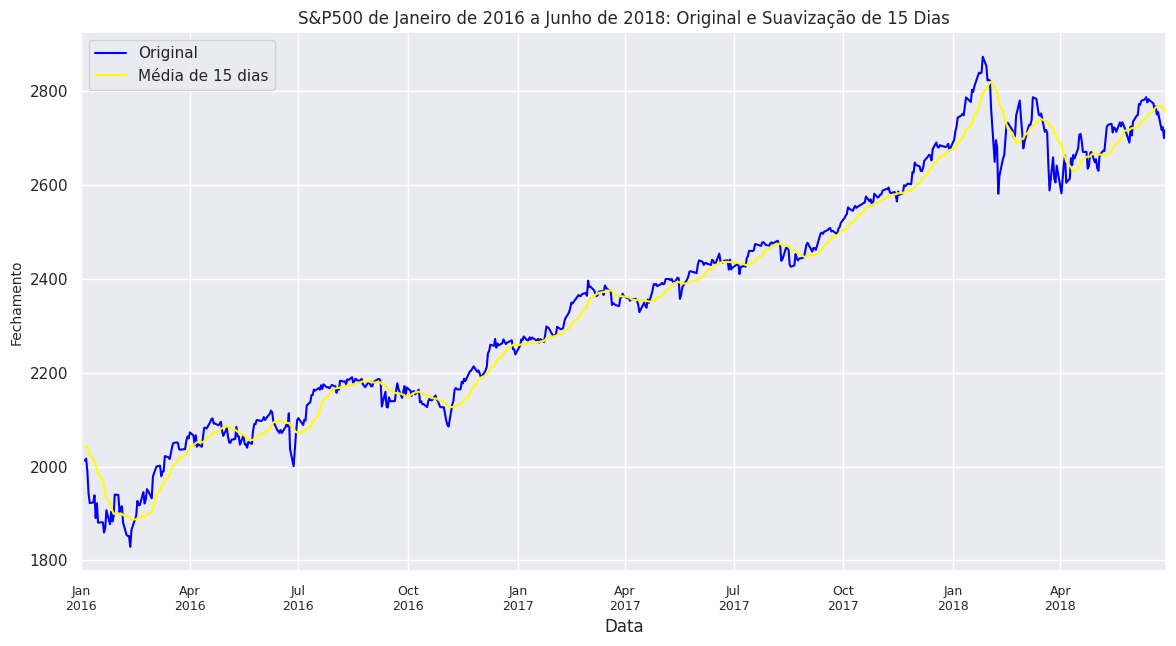

In [ ]:
import matplotlib.dates as mdates #bib para manipular/formatar datas

#Aplicando uma suavização de 15 dias (replicação do código anterior)
spx_df['suavizacao_15'] = spx_df['close'].rolling(window=15).mean()

#Filtrando as datas entre 2016 e 2018 com a criação de listas e a função pd.Timestamp (utilização em Séries Temporais)
start_date = pd.Timestamp('2016-01-01')
end_date = pd.Timestamp('2018-06-29')
spx_filtered = spx_df[(spx_df['date'] >=start_date) & (spx_df['date'] <=end_date)]

#Ajustando o tamanho e criando a visualização (lineplot do seaborn) / criando 2 gráficos de linha
plt.figure(figsize=(14, 7))
sns.lineplot(data=spx_filtered, x='date', y='close', label='Original', color='blue')
sns.lineplot(data=spx_filtered, x='date', y='suavizacao_15', label='Média de 15 dias', color='yellow')

#Eixo y
plt.ylabel('Fechamento', fontsize=10)
#Título
plt.title('S&P500 de Janeiro de 2016 a Junho de 2018: Original e Suavização de 15 Dias')

#Delimitando os limites do eixo x
plt.xlabel('Data')
plt.xlim(start_date, end_date) # (x limits)
plt.xticks(fontsize=9) #configurando tamanho dos ticks do eixo x

#Confifuração para intervalo de 2 meses com (ticks locators)
fmt = mdates.DateFormatter('%b\n%Y') 
# %b: Abreviação do nome do mês. /n: pular a linha
# %Y: Ano completo com quatro dígitos (maiúsculo)

plt.gca().xaxis.set_major_formatter(fmt)
# gca()"Get Current Axis" (Obter Eixo Atual). Retornar o eixo atual
# xaxis.set_major_formatter> método do eixo x que define o formato dos rótulos principais (major ticks) no eixo x.



plt.legend()
plt.show()



**Sinal de Compra:** A ocorrência de um cruzamento da série original (preço de fechamento diário) acima da média móvel de 15 dias é interpretada como um sinal de compra. Este fenômeno é frequentemente associado ao início de uma tendência ascendente no mercado, indicando potencialmente um momento propício para a aquisição de ativos.

**Sinal de Venda:** De forma análoga, um cruzamento da série original abaixo da média móvel de 15 dias é considerado um sinal de venda. Este evento sugere o possível início de uma tendência de declínio nos preços, recomendando que pode ser um momento adequado para a alienação de 